In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

In [53]:
dataset = pd.read_csv('Crop_recommendation.csv')

In [54]:
x_val = dataset[['Nitrogen_Soil', 'Phosphorus_Soil', 'potassium_Soil', 'temperature', 'humidity', 'ph', 'rainfall']].values
y_val = dataset[['label']]
y_val = y_val.values.ravel()

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=0)

In [56]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [57]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [58]:
y_pred = model.predict(x_test)

In [59]:
accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy for naive bayes:", accuracy_NB)

Accuracy for naive bayes: 0.9931818181818182


In [60]:
precision_NB = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
recall_NB = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
print("Precision for naive bayes:", precision_NB)
print("Recall for naive bayes:", recall_NB)

Precision for naive bayes: 0.9940340909090909
Recall for naive bayes: 0.9931818181818182


In [61]:
conf_matrix_NB = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for naive bayes:")
print(conf_matrix_NB)

Confusion Matrix for naive bayes:
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]


In [62]:
cross_val_score_NB = cross_val_score(model, x_val, y_val, cv=5)

In [63]:
print("Cross-Validation Scores for naive bayes:", cross_val_score_NB)
print("Mean Cross-Validation Score for naive bayes:", cross_val_score_NB.mean())

Cross-Validation Scores for naive bayes: [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Mean Cross-Validation Score for naive bayes: 0.9950000000000001


In [64]:
# KNN algorithm use

In [65]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Define range of n_neighbors values to try
neighbors = range(1, 21)  # Try n_neighbors from 1 to 20

In [67]:
accuracies = []
precisions = []
recalls = []

In [68]:
for n in neighbors:
    # Train the KNN model
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Calculate precision for each label and take the average
    recall = recall_score(y_test, y_pred, average='macro')  # Calculate recall for each label and take the average
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

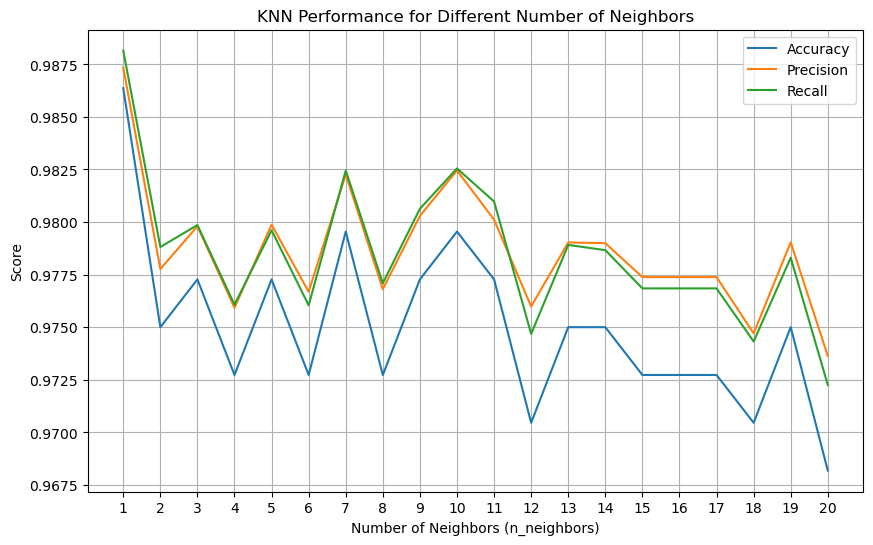

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, label='Accuracy')
plt.plot(neighbors, precisions, label='Precision')
plt.plot(neighbors, recalls, label='Recall')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance for Different Number of Neighbors')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [70]:
cross_val_score_KNN = cross_val_score(model, x_val, y_val, cv=5)

In [71]:
print("Cross-Validation Scores for KNN:", cross_val_score_KNN)
print("Mean Cross-Validation Scores for KNN:", cross_val_score_KNN.mean())

Cross-Validation Scores for KNN: [0.96590909 0.95909091 0.97954545 0.96363636 0.96818182]
Mean Cross-Validation Scores for KNN: 0.9672727272727272


In [72]:
conf_matrix_KNN = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for KNN:")
print(conf_matrix_KNN)

Confusion Matrix for KNN:
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0 

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [74]:
label_values = np.unique(y_val)
accuracies = np.zeros(len(label_values))
precisions = np.zeros(len(label_values))
recalls = np.zeros(len(label_values))

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=0)

In [75]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [76]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [77]:
# Append metrics to lists
accuracies[:] = accuracy
precisions[:] = precision
recalls[:] = recall

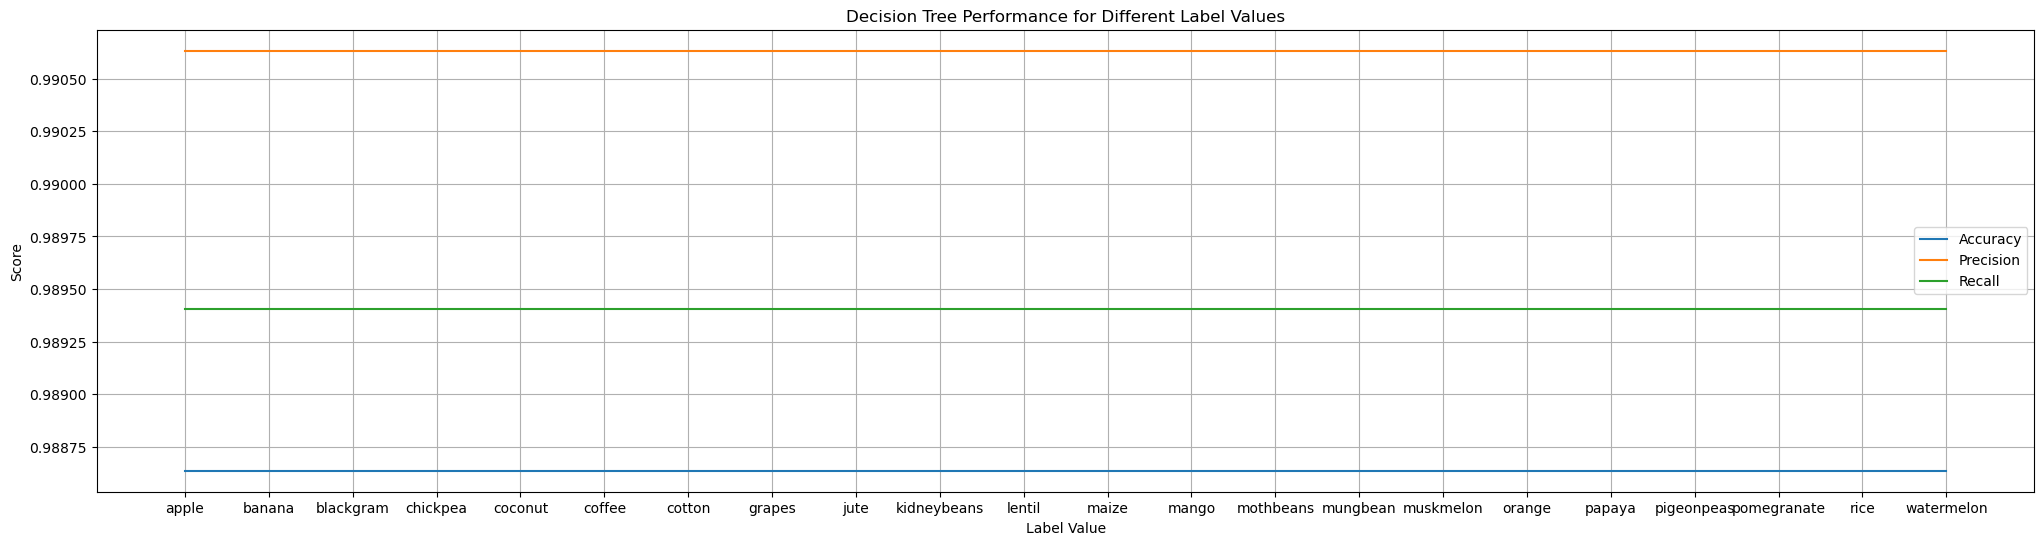

In [78]:
plt.figure(figsize=(25, 6))
plt.plot(label_values, accuracies, label='Accuracy')
plt.plot(label_values, precisions, label='Precision')
plt.plot(label_values, recalls, label='Recall')
plt.xlabel('Label Value')
plt.ylabel('Score')
plt.title('Decision Tree Performance for Different Label Values')
plt.xticks(label_values)
plt.legend()
plt.grid(True)
plt.show()

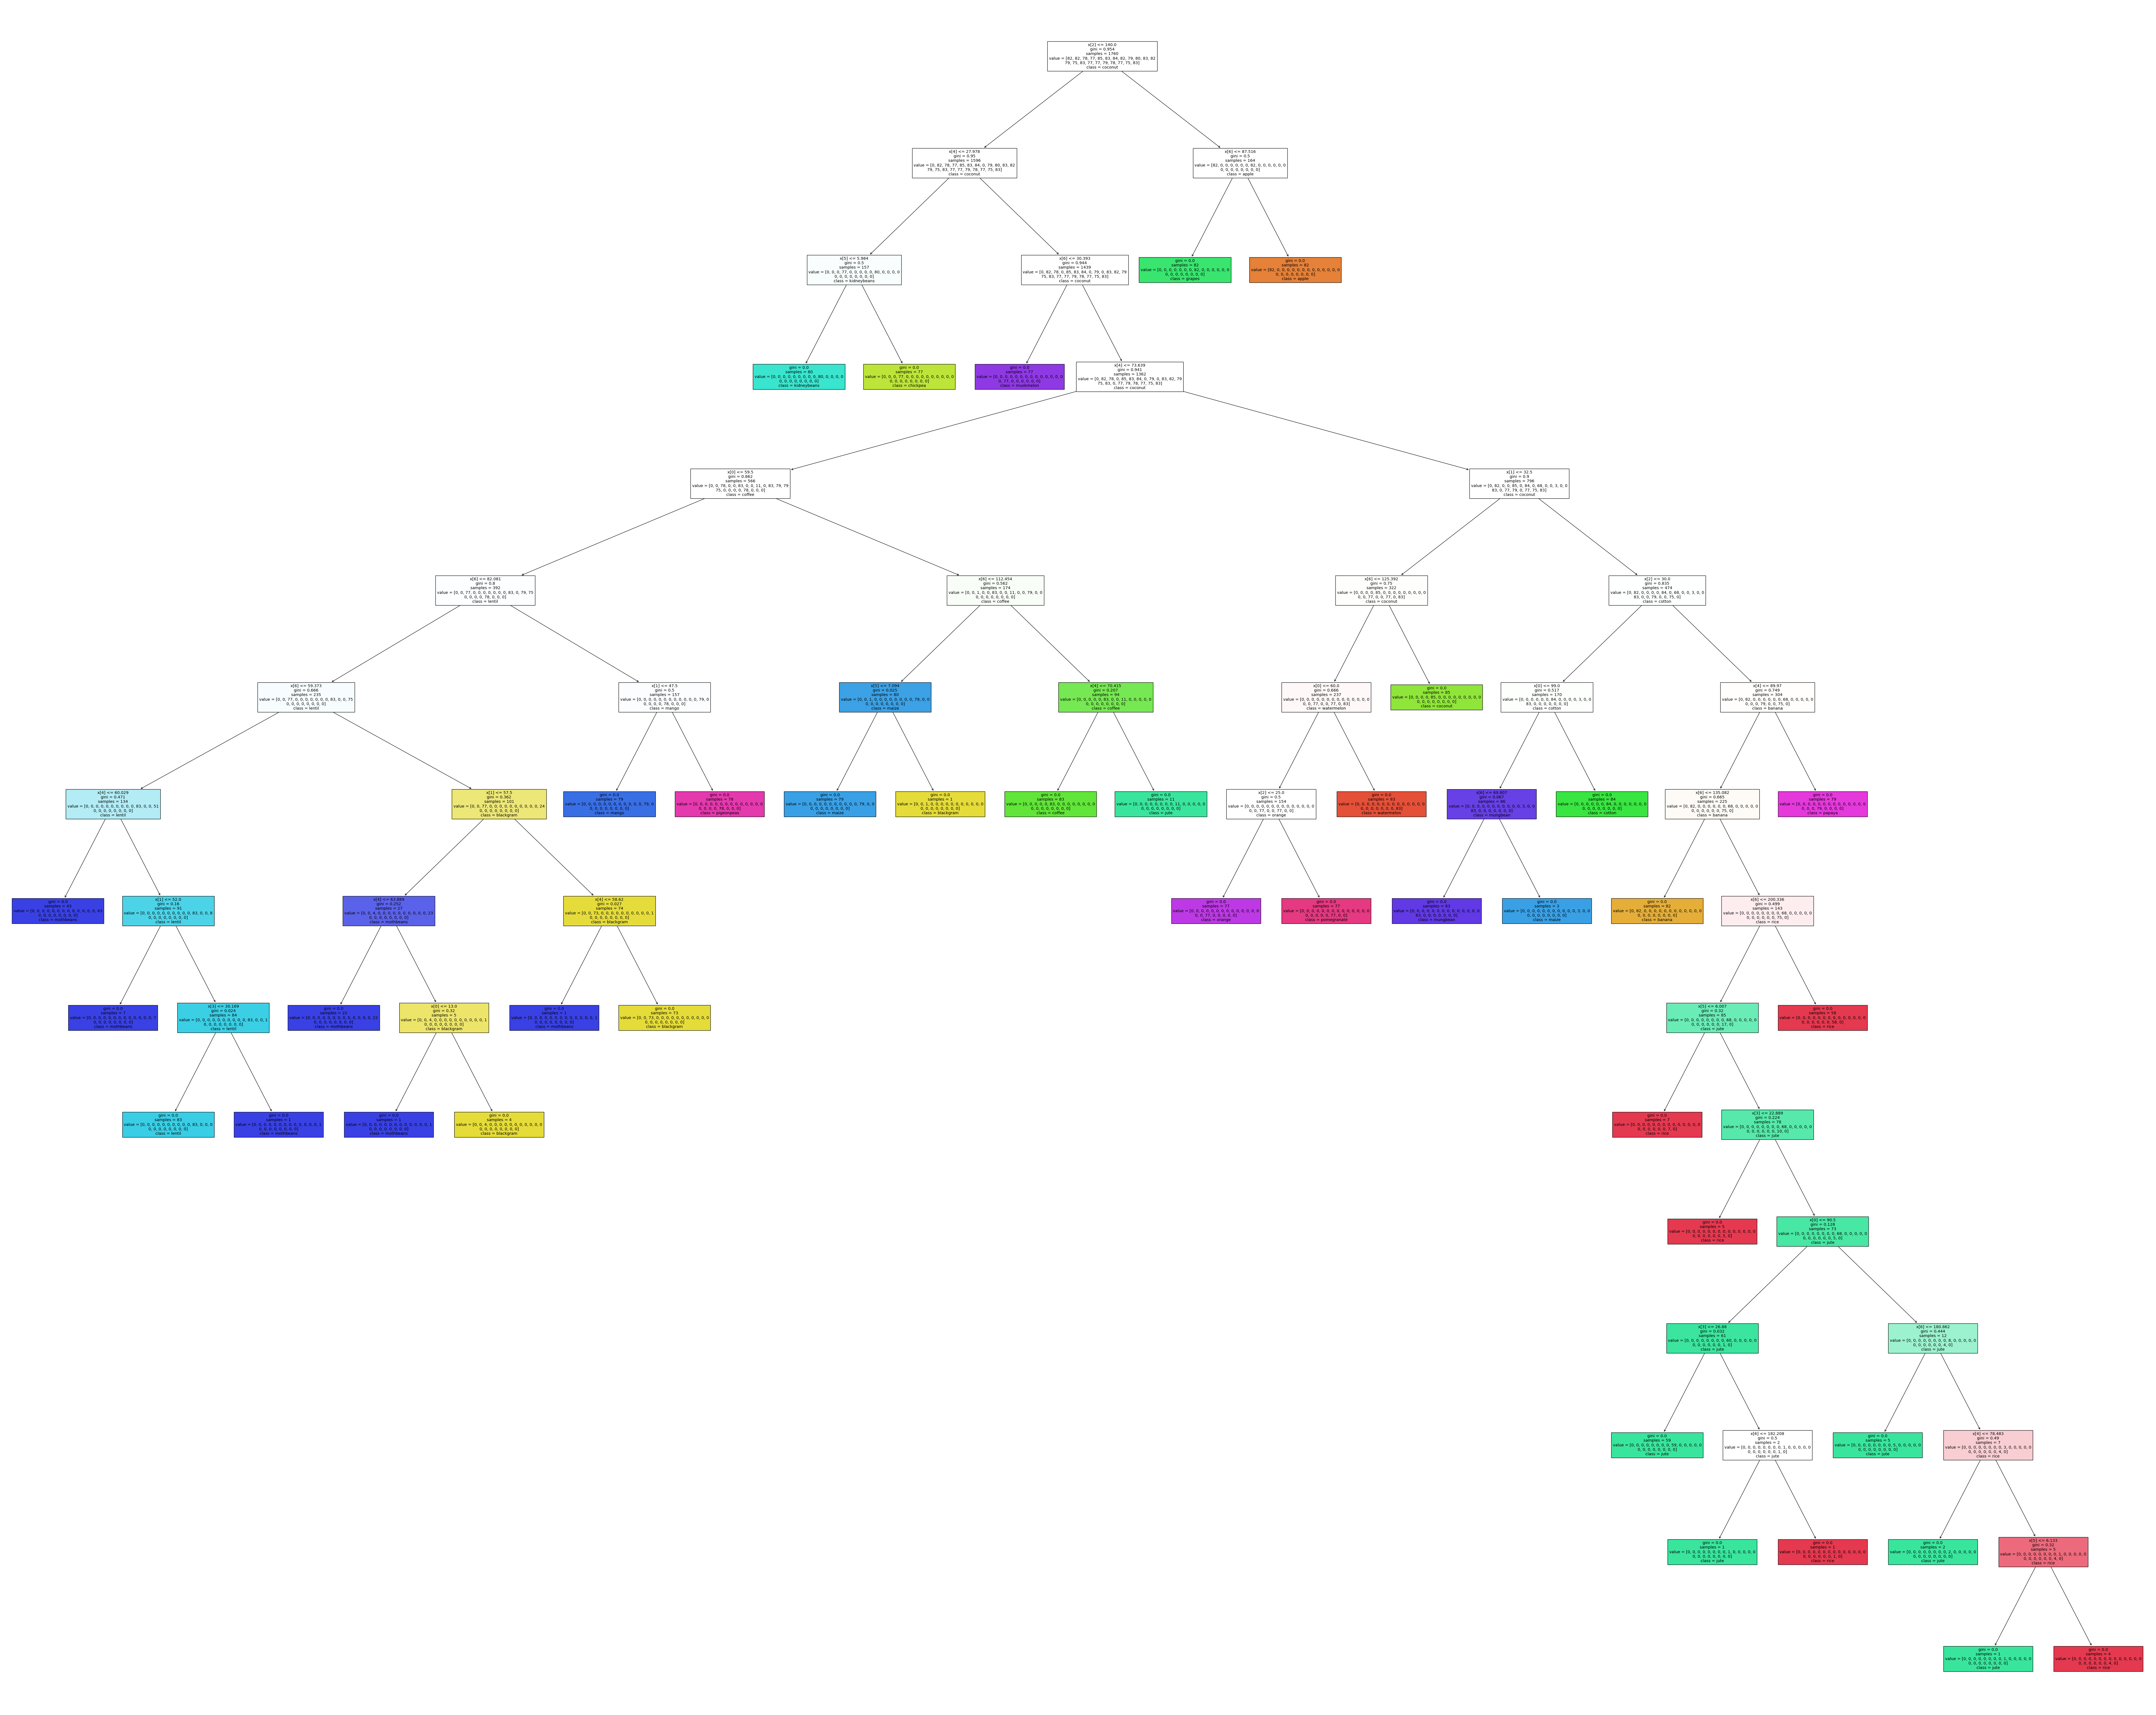

In [79]:
# Step 5: Visualize the Decision Tree
plt.figure(figsize=(100, 80))
plot_tree(model, filled=True, class_names=list(model.classes_))  # Convert classes_ array to list
plt.show()

In [80]:
cross_val_score_DT = cross_val_score(model, x_val, y_val, cv=5)

In [81]:
print("Cross-Validation Scores for Decision Tree:", cross_val_score_DT)
print("Mean Cross-Validation Score for Decision Tree:", cross_val_score_DT.mean())

Cross-Validation Scores for Decision Tree: [0.99090909 0.98409091 0.99318182 0.98863636 0.98181818]
Mean Cross-Validation Score for Decision Tree: 0.9877272727272727


In [82]:
conf_matrix_DT = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_DT)

Confusion Matrix for Decision Tree:
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  2  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0

In [83]:
from sklearn.metrics import f1_score
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

models = [nb_model, knn_model, dt_model]
model_names = ['Naive Bayes', 'KNN', 'Decision Tree']

In [84]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

In [85]:
for model in models:
    # Perform cross-validation
    accuracy = np.mean(cross_val_score(model, x_val, y_val, cv=5, scoring='accuracy'))
    precision = np.mean(cross_val_score(model, x_val, y_val, cv=5, scoring='precision_macro'))
    recall = np.mean(cross_val_score(model, x_val, y_val, cv=5, scoring='recall_macro'))
    f1 = np.mean(cross_val_score(model, x_val, y_val, cv=5, scoring='f1_macro'))
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

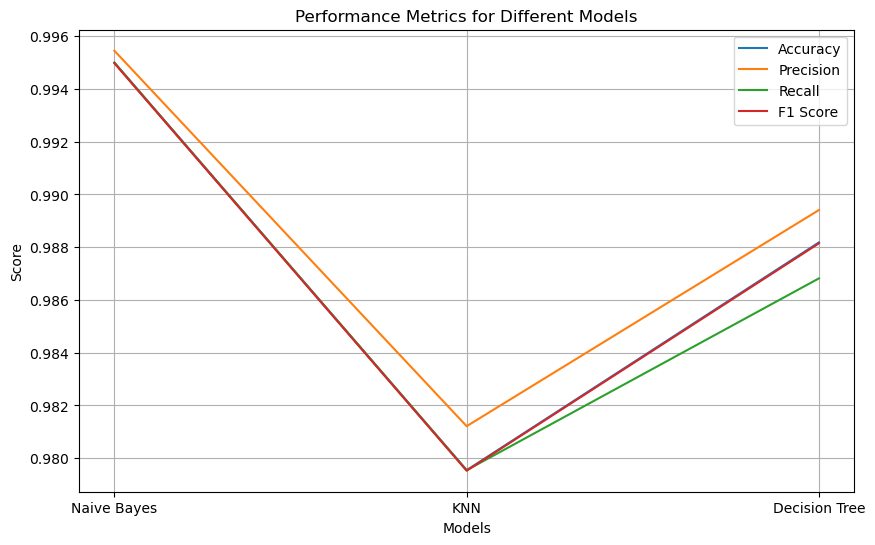

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, label='Accuracy')
plt.plot(model_names, precisions, label='Precision')
plt.plot(model_names, recalls, label='Recall')
plt.plot(model_names, f1_scores, label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Models')
plt.legend()
plt.grid(True)
plt.show()

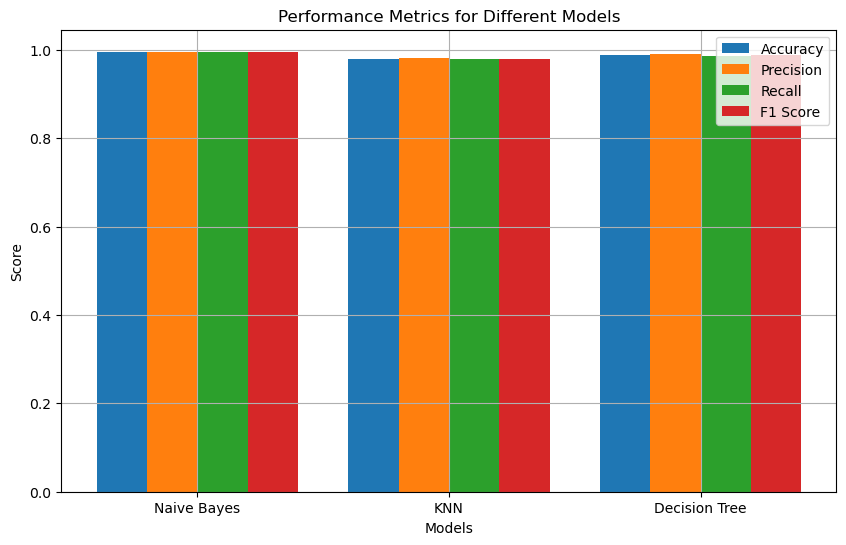

In [87]:
x = np.arange(len(model_names))
width = 0.2  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5*width, precisions, width, label='Precision')
plt.bar(x + 0.5*width, recalls, width, label='Recall')
plt.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Models')
plt.xticks(x, model_names)
plt.legend()
plt.grid(True)
plt.show()

In [89]:
from sklearn.metrics import make_scorer
# Initialize dictionary to store performance metrics
metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Define custom scorers for precision, recall, and f1
precision_scorer = make_scorer(precision_score, average='macro')
recall_scorer = make_scorer(recall_score, average='macro')
f1_scorer = make_scorer(f1_score, average='macro')

In [90]:
# Loop through each model
for model, model_name in zip(models, model_names):
    # Perform cross-validation for each metric
    accuracy = cross_val_score(model, x_val, y_val, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(model, x_val, y_val, cv=5, scoring=precision_scorer).mean()
    recall = cross_val_score(model, x_val, y_val, cv=5, scoring=recall_scorer).mean()
    f1 = cross_val_score(model, x_val, y_val, cv=5, scoring=f1_scorer).mean()
    
    # Store metrics in the dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

In [91]:
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
print("Performance Metrics for Different Models:")
print(metrics_df)

Performance Metrics for Different Models:
           Model  Accuracy  Precision    Recall  F1 Score
0    Naive Bayes  0.995000   0.995451  0.995000  0.994979
1            KNN  0.979545   0.981214  0.979545  0.979525
2  Decision Tree  0.988636   0.987716  0.989545  0.988603
